# Transformaciones en el dominio de la frecuencia

Cuando una señal atraviesa un sistema se modifica. Ello implica cambios tanto en la señal como en su espectro.

En este cuaderno veremos qué relación tienen los cambios en el dominio del tiempo con los cambios en el dominio de la frecuencia para dos casos:

* Una compresión temporal

* Un retardo

In [3]:
%matplotlib inline
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation
from IPython.display import HTML

#Hacer que las figuras por defecto salgan más grandes
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

import pickle
import math

import warnings
warnings.filterwarnings('ignore')
import utils as U
import UPVlog
nombre_cuaderno='P2-3-Transformaciones en frecuencia'
mylogger=UPVlog.UPVlog(nombre_cuaderno)

## Señal cuadrada

La señal sobre la que estudiaremos los cambios es una onda cuadrada con un ciclo de trabajo del 50 % y frecuencia 2 Hz.

La señal en el dominio del tiempo tiene este aspecto:

<center>

<img title="Cuadrada" alt="Cuadrada" src="images/o_cuadrada.png" width=500  align="center">

    
</center>


En el cuaderno anterior calculamos sus componentes espectrales. Ahora simplemente cargaremos los valores de los términos del espectro que están en el fichero *espectro_cuadrada.pkl.*




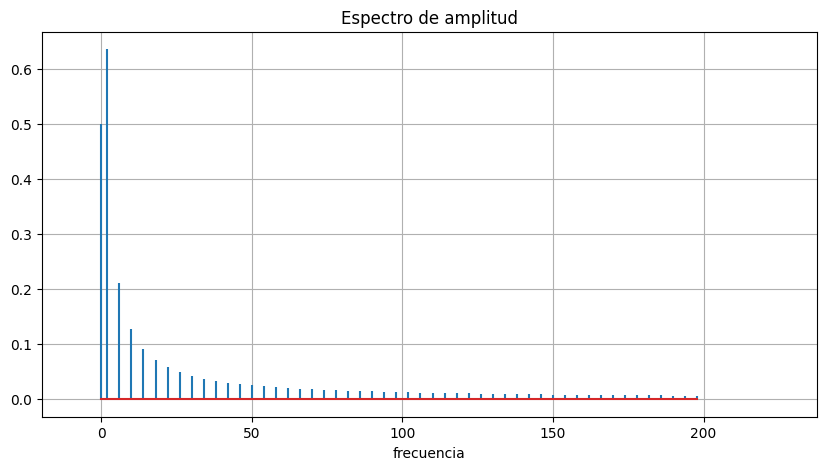

In [4]:
# Cargamos la lista de tuplas (frec,ampl,fase) correspondientes al espectro de la onda cuadrada

mylogger.log("Cargando y dibujando espectro onda cuadrada")
with open('espectro_cuadrada.pkl', 'rb') as f:
    espectro = pickle.load(f)

# Dibujamos el espectro de amplitud
U.dibujaEspectro(espectro)

Comprobaremos a qué señal corresponde sumando las sinusoides representadas por el espectro. Para ello emplearemos la función *creaComponentes()*:

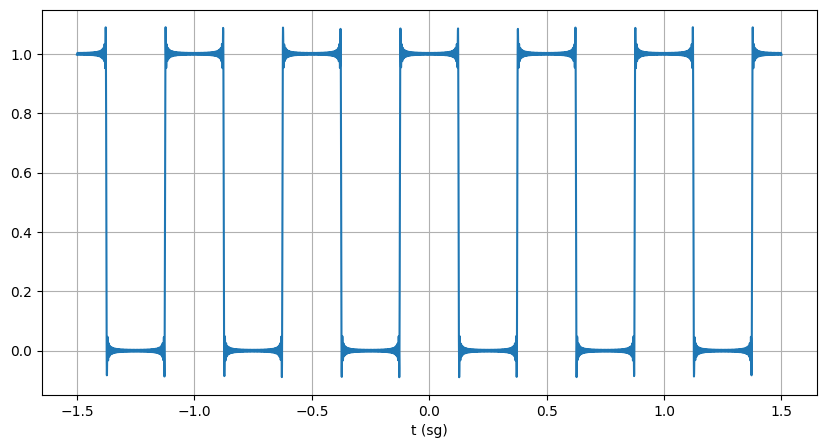

In [7]:
mylogger.log("Creando sinudoides a partir del espectro")
t=np.linspace(-1.5,1.5,5000)
componentes=U.creaComponentes(espectro,t)
# componentes es una matriz. Cada columna es una sinusoide. Cada fila es un instante

# Para representar la señal correspondiente al espectro BASTA SUMAR las sinusoides

s=np.sum(componentes,axis=1)

#Representamos la señal correspondiente al espectro cargado
_=plt.plot(t,s)
_=plt.grid()
_=plt.xlabel('t (sg)')



Es importante prestar atención a:

* Que hay un pulso centrado en $t=0$

* Que el periodo es $T=0.5$

* El ancho de la parte no-nula del pulso es $\tau=0.25$

_________________

# Espectro de la señal comprimida en el tiempo.

En teoría se estudió que si una señal se comprime en el tiempo, su espectro:

* Conserva las amplitudes de cada componente.

* Conserva las fases de cada componente.

* Las frecuencias de cada componente se multiplican por el factor de compresión temporal. En otras palabras, si una señal se *comprime* para que dure la mitad, cada una de las componentes frecuenciales de la señal comprimida tendrá una frecuencia doble que la de la original. En ese sentido se suele decir que **si una señal se comprime en el tiempo por un factor, se expandirá en frecuencia por el mismo factor**

En este apartado, implementaremos una función que reciba como entrada el espectro de una señal y devuelva el espectro de la señal comprimida en el tiempo por ese factor.


In [12]:
def espectro_compresion(espectro,factor):
    '''
    espectro: lista de tuplas de 3 elementos (frec,ampl,fase)
    
    factor: factor de compresión temporal. Si factor==2, la señal dura la mitad, el periodo se hace la mitad, 
    los anchos de los pulsos se hacen la mitad
    
    Devuelve: el espectro correspondiente a la señal de salida
    '''
    espectro_out = None     
### BEGIN SOLUTION 
    ## Este primero se lo podemos hacer en clase
    
    ncomponentes = len(espectro)
    espectro_out=[]
    for k in range(ncomponentes):
        frecuencia = espectro[k][0] *factor
        amplitud = espectro[k][1]
        fase = espectro[k][2]      
       
        espectro_out.append( (frecuencia, amplitud, fase) )
### END SOLUTION
    
    return espectro_out

## Comprobación

Probaremos la función anterior aplicándola al espectro de la onda cuadrada

In [16]:
mylogger.log("Testing Espectro compresión temporal")

factor = 2
esp_comprimida = espectro_compresion(espectro,factor)

### BEGIN TESTS
assert esp_comprimida is not None, "Función no implementada"
assert len(esp_comprimida)==len(espectro), "Los espectros deben ser listas con la misma cantidad de elementos"
assert esp_comprimida[0][0] == espectro[0][0], "Función contiene errores"
assert esp_comprimida[43][0] == 2*espectro[43][0], "Función contiene errores"
assert esp_comprimida[26][1] == espectro[26][1], "Función contiene errores"
### END TESTS

### BEGIN HIDDEN TESTS
### AUTOTEST espectro_compresion(espectro[3:11],3)
### END HIDDEN TESTS

mylogger.log("Success Testing Espectro compresión temporal")


Para comprobar adicionalmente que la función *espectro_copresion()* es correcta generaremos la señal en el dominio del tiempo correspondiente *esp_comprimida*

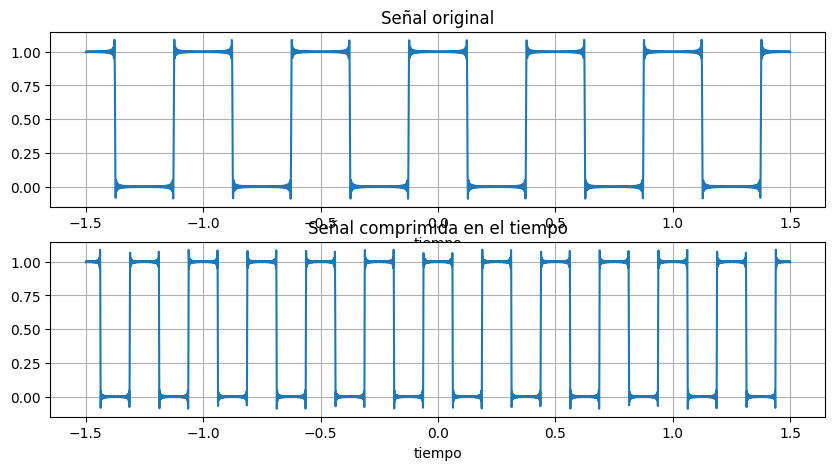

In [18]:
# Calcule la señal comprimida y representela gráficamente
senyal_comprimida=None # Calcule senyal_comprimida en los instantes t

t=np.linspace(-1.5,1.5,5000)
### BEGIN SOLUTION
cc=U.creaComponentes(esp_comprimida,t)
senyal_comprimida = np.sum(cc,axis=1)
### END SOLUTION
_=plt.subplot(2,1,1)
_=plt.plot(t,s)
_=plt.grid()
_=plt.title('Señal original')
_=plt.xlabel('tiempo')

_=plt.subplot(2,1,2)
_=plt.plot(t,senyal_comprimida)
_=plt.grid()
_=plt.title('Señal comprimida en el tiempo')
_=plt.xlabel('tiempo')

El aspectro de las gráficas anteriores debe ser similar a este

<center>

<img title="Comprimida" alt="Comprimida" src="images/comprimida.png" width=500  align="center">
    
</center>

En el caso de que no lo sea revise lo hecho.

In [31]:
mylogger.log("Testing gráfica señal Comprimida")
### BEGIN TESTS
assert senyal_comprimida is not None
assert senyal_comprimida.shape==(len(t),)
assert abs(np.mean(senyal_comprimida) - 0.5) < 1e-3
assert np.min(senyal_comprimida) < 0
assert np.max(senyal_comprimida) > 1
periodo=np.mean(np.diff(np.squeeze(np.argwhere(np.diff((senyal_comprimida>0.5).astype(np.float32))>0))))
print("Periodo=",periodo)
assert periodo > 400 and periodo < 430
### END TESTS
# Compruebe que se pasan los tests. Se evalúa con tests adicionales ocultos


mylogger.log("Success Testing gráfica señal Comprimida")

Periodo= 416.54545454545456


# Espectro de una señal retrasada
El objetivo de este ejercicio es dado el espectro de una señal, obtener el espectro correspondiente a la misma señal retrasada "t0".
Seguidamente se comprobará que la suma de las componentes espectrales corresponde a una señal retrasada.

Revise en teoría el efecto que se produce en el espectro al retrasar una señal en el tiempo.

In [64]:
def espectro_retardo(espectro,t0):
    '''
    espectro: lista de tuplas de 3 elementos (frec,ampl,fase)
    t0: retardo a aplicar
    
    Devuelve el espectro de la señal retrasada como lista de tuplas (frec,ampl,fase)
    '''
        
    out=None

    ### BEGIN SOLUTION
    ncomponentes = len(espectro)
    out=[]
    for k in range(ncomponentes):
        frecuencia = espectro[k][0] 
        amplitud = espectro[k][1]
        fase = espectro[k][2]  - 2*np.pi*frecuencia*t0    
       
        out.append( (frecuencia, amplitud, fase) )
    ### END SOLUTION      
    
    return out

In [74]:
# Comprobación de la función
# Su frecuencia era 2 --> su periodo era 0.5
# Retrasaré la señal 

with open('espectro_cuadrada.pkl', 'rb') as f:
    espectro = pickle.load(f)
    
t0=0.05
esp_retardo= espectro_retardo(espectro,t0);


mylogger.log("Testing Espectro Retardo")
### BEGIN TESTS
assert esp_retardo is not None
assert len(esp_retardo)==len(espectro)
assert esp_retardo[0][2] == espectro[0][2], "Función contiene errores"

print(esp_retardo[7], espectro[7])
assert esp_retardo[7][2] != espectro[7][2], "Función contiene errores"
assert esp_retardo[43][0] == espectro[43][0], "Función contiene errores"
assert esp_retardo[51][1] == espectro[51][1], "Función contiene errores"
### END TESTS

### BEGIN HIDDEN TESTS
### AUTOTEST espectro_retardo(espectro[3:11],3)
### END HIDDEN TESTS

mylogger.log("Success Testing Espectro Retardo")

(14.0, 0.09094568176679733, -1.2566370614359172) (14.0, 0.09094568176679733, 3.141592653589793)


In [75]:
'''
Ahora, a partir del espectro de la señal retrasada obtentremos la señal retrasada y la visualizaremos en una gráfica para ver si 
realmente corresponde con la señal original retrasada t0=0.05
'''

senyal_retrasada = None # obtener la senyal_retrasada en el dominio del tiempo en los instantes t
t=np.linspace(-1.5,1.5,5000)

### BEGIN SOLUTION
cc=U.creaComponentes(esp_retardo,t)
senyal_retrasada = np.sum(cc,axis=1)
### END SOLUTION


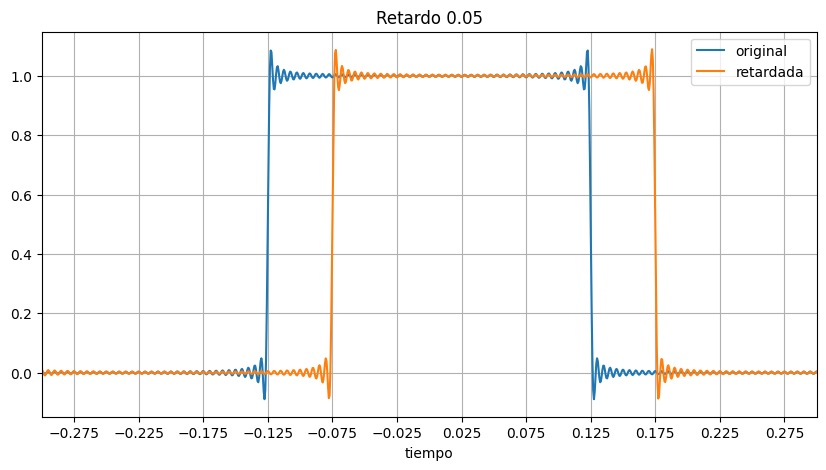

In [85]:
mylogger.log("Testing gráfica señal Retrasada")
### BEGIN TESTS
assert senyal_retrasada is not None
assert senyal_retrasada.shape==(len(t),)
assert abs(np.mean(senyal_retrasada) - 0.5) < 1e-3
assert np.min(senyal_retrasada) < 0
assert np.max(senyal_retrasada) > 1


### END TESTS

### BEGIN HIDDEN TESTS
n1=np.squeeze(np.argwhere(np.diff((s>0.5).astype(np.float32))>0))
n2=np.squeeze(np.argwhere(np.diff((senyal_retrasada>0.5).astype(np.float32))>0))
Ts=np.mean(t[1]-t[0])
ret=(n2[n2>n1[0]][0]-n1[0])*Ts
assert abs(ret-t0) < Ts, "Senyal retrasada mal" 
### END HIDDEN TESTS
# Compruebe que se pasan los tests. Se evalúa con tests adicionales ocultos

mylogger.log("Success Testing gráfica señal Retrasada")

# Representación gráfica para verificar : DEBE OBSERVAR QUE LA SEÑAL RETRASADA ES CORRECTA
kk=plt.plot(t,s)
kk=plt.plot(t,senyal_retrasada)
kk=plt.legend(['original','retardada'])
kk=plt.title('Retardo 0.05')
kk=plt.xlabel('tiempo')
kk=plt.grid()
kk=plt.xticks(np.arange(-0.4+0.25/2,0.4,0.05))
kk=plt.xlim(-0.3,0.3)

El aspectro de las gráficas anteriores debe ser similar a este

<center>

<img title="Retrasada" alt="Retrasada" src="images/retrasada.png" width=500  align="center">
    
</center>

En el caso de que no lo sea revise lo hecho.

Si lo desea puede experimentar cambiando el retardo, generando de nuevo el espectro y la señal en el tiempo correspondiente